In [2]:
#Imports the Pandas library for data manipulation and analysis.
import pandas as pd
# Imports the Matplotlib library for creating visualizations.
import matplotlib.pyplot as plt
#Imports the NumPy library for numerical computations.
import numpy as np
#Standardizes features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler
#Splits your dataset into training and testing sets.
from sklearn.model_selection import train_test_split
## Implements the Logistic regression algorithm.
from sklearn.linear_model import LogisticRegression
#Measures the goodness of fit of the model.
from sklearn.metrics import r2_score
# a utility in scikit-learn used to convert categorical labels into a numeric form.
from sklearn.preprocessing import LabelEncoder
# It provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns 

In [3]:
#line of code reads a CSV file named insurance.csv located in the Dataset directory into a pandas DataFrame called h1n1.
h1n1=pd.read_csv('Dataset/h1n1_vaccine_prediction.csv')
h1n1

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


In [4]:
#If h1n1 is a pandas DataFrame or a NumPy array
h1n1.shape

(26707, 34)

In [5]:
#function in pandas provides a quick summary of the statistics for each numeric column in a DataFrame. 
h1n1.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [6]:
# Assuming h1n1 is a pandas DataFrame
h1n1.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [7]:
# Count the number of duplicate rows in the h1n1 DataFrame
h1n1.duplicated().sum()

0

In [8]:
# Count the number of missing values in each column of the h1n1 DataFrame
h1n1.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [9]:
#the drop from the  null values
h1n1 = h1n1.dropna()

In [10]:
# Count the number of missing values in each column of the h1n1 DataFrame
h1n1.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

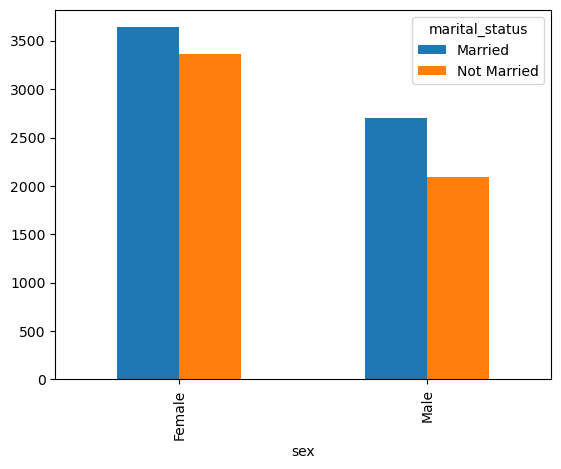

In [11]:
# Pivot the DataFrame to create a matrix of counts
pivot_table = h1n1.pivot_table(index='sex', columns='marital_status', aggfunc='size')

# Create a bar plot
pivot_table.plot(kind='bar')

plt.show()

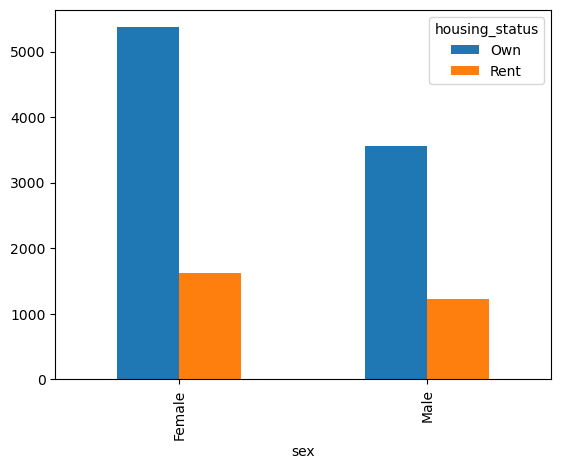

In [12]:
# Pivot the DataFrame to create a matrix of counts
pivot_table = h1n1.pivot_table(index='sex', columns='housing_status', aggfunc='size')

# Create a bar plot
pivot_table.plot(kind='bar')

plt.show()

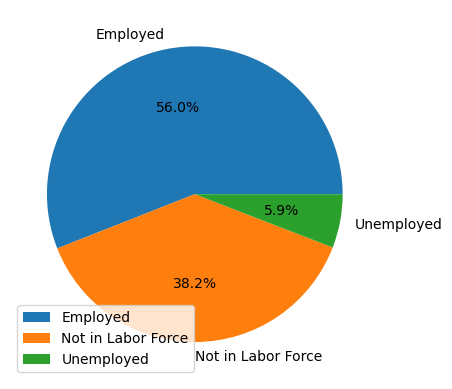

In [13]:
pivot_table = h1n1.pivot_table(index='employment', values='sex', aggfunc='count')

# Create a pie chart
pivot_table.plot(kind='pie', y='sex', autopct='%1.1f%%', legend=True)

plt.ylabel('')  
plt.show()

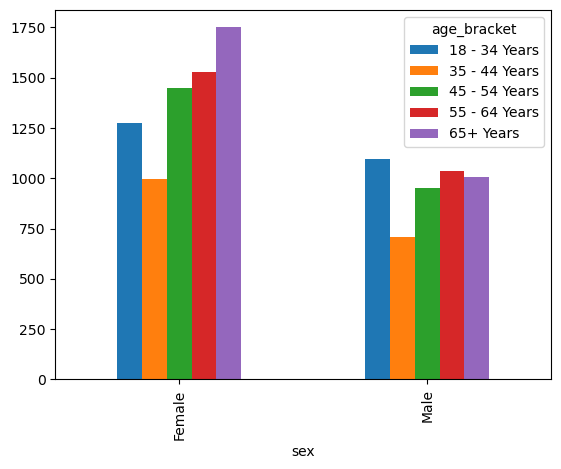

In [14]:
# Pivot the DataFrame to create a matrix of counts
pivot_table = h1n1.pivot_table(index='sex', columns='age_bracket', aggfunc='size')

# Create a bar plot
pivot_table.plot(kind='bar')

plt.show()

In [15]:
#Create an instance of LabelEncoder
race_encoder = LabelEncoder()
sex_encoder = LabelEncoder()
income_level_encoder = LabelEncoder()
marital_status_encoder = LabelEncoder()
housing_status_encoder = LabelEncoder()
employment_encoder = LabelEncoder()
census_msa_encoder = LabelEncoder()
age_bracket_encoder = LabelEncoder()
qualification_encoder = LabelEncoder()
#the fit_transform method to encode the categorical values apply encoding
h1n1['race']= race_encoder.fit_transform(h1n1['race'])
h1n1['sex']= race_encoder.fit_transform(h1n1['sex'])
h1n1['income_level']= income_level_encoder.fit_transform(h1n1['income_level'])
h1n1['marital_status']= marital_status_encoder.fit_transform(h1n1['marital_status'])
h1n1['housing_status']= housing_status_encoder.fit_transform(h1n1['housing_status'])
h1n1['employment']= employment_encoder.fit_transform(h1n1['employment'])
h1n1['census_msa']= census_msa_encoder.fit_transform(h1n1['census_msa'])
h1n1['age_bracket']= age_bracket_encoder.fit_transform(h1n1['age_bracket'])
h1n1['qualification']= qualification_encoder.fit_transform(h1n1['qualification'])
h1n1

C:\Users\Admin\AppData\Local\Temp\ipykernel_18856\403604907.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h1n1['race']= race_encoder.fit_transform(h1n1['race'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_18856\403604907.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h1n1['sex']= race_encoder.fit_transform(h1n1['sex'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_18856\403604907.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,3,0,2,1,0,1,2,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,3,1,2,1,1,0,0,0.0,0.0,0
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,3,0,0,0,0,0,2,2.0,0.0,1
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,3,1,0,1,0,1,0,0.0,0.0,0
10,10,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,3,1,0,0,1,0,0,2.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26697,26697,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,3,1,1,0,0,1,1,1.0,0.0,0
26699,26699,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,3,0,0,0,0,0,0,1.0,0.0,0
26701,26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,3,0,1,1,1,1,1,3.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,3,1,0,1,1,0,1,1.0,0.0,0


In [16]:
#used to remove a specific column from the DataFrame. 
h1n1 = h1n1.drop(columns='unique_id', axis=1)

In [17]:
#the pairwise correlation of columns in the DataFrame.
h1n1.corr()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
h1n1_worry,1.000000,0.049069,0.108410,0.236030,0.162254,0.290278,0.244147,0.236272,0.244723,0.158089,...,-0.144386,-0.141845,0.058079,-0.030966,0.004326,0.065511,-0.000544,-0.020616,0.043802,0.188165
h1n1_awareness,0.049069,1.000000,-0.010008,0.071650,0.039293,0.081308,-0.048993,-0.072884,0.072293,0.095849,...,0.163936,-0.089590,-0.050974,-0.119251,-0.123599,-0.128476,-0.054392,0.008401,0.053219,0.160849
antiviral_medication,0.108410,-0.010008,1.000000,0.052989,0.144986,0.060007,0.108812,0.119786,0.060948,0.042650,...,-0.122444,-0.011682,0.071676,0.031910,0.076920,0.001983,0.018065,0.038442,0.071167,0.021498
contact_avoidance,0.236030,0.071650,0.052989,1.000000,0.074952,0.347909,0.230588,0.219110,0.337257,0.068538,...,-0.014792,-0.124971,0.005318,-0.048907,-0.036559,0.028412,-0.023228,0.011255,0.027918,0.060933
bought_face_mask,0.162254,0.039293,0.144986,0.074952,1.000000,0.081524,0.184630,0.169308,0.110183,0.079745,...,-0.082950,-0.054416,0.051185,0.011680,0.054627,0.030397,0.000575,0.025375,-0.006144,0.073868
wash_hands_frequently,0.290278,0.081308,0.060007,0.347909,0.081524,1.000000,0.183973,0.186460,0.366908,0.090317,...,-0.075016,-0.170723,0.018600,-0.044630,-0.023153,0.004089,-0.005504,0.009053,0.039936,0.097192
avoid_large_gatherings,0.244147,-0.048993,0.108812,0.230588,0.184630,0.183973,1.000000,0.578556,0.245413,0.078799,...,-0.124221,-0.057241,0.030323,0.031041,0.055030,0.136772,0.050071,-0.032486,-0.010547,0.036809
reduced_outside_home_cont,0.236272,-0.072884,0.119786,0.219110,0.169308,0.186460,0.578556,1.000000,0.272950,0.062120,...,-0.141972,-0.049388,0.054119,0.032406,0.065664,0.141606,0.032295,-0.024569,-0.017698,0.030403
avoid_touch_face,0.244723,0.072293,0.060948,0.337257,0.110183,0.366908,0.245413,0.272950,1.000000,0.083664,...,-0.059515,-0.183377,0.000862,-0.037936,-0.026310,0.024523,0.015164,-0.001617,0.016705,0.079728
dr_recc_h1n1_vacc,0.158089,0.095849,0.042650,0.068538,0.079745,0.090317,0.078799,0.062120,0.083664,1.000000,...,0.005662,-0.043386,0.022828,-0.023636,-0.012037,0.034644,-0.003915,0.002644,0.005956,0.415482


In [18]:
# create a new DataFrame x by removing the column 'h1n1_vaccine' from the original DataFrame h1n1.
x=h1n1.drop(['h1n1_vaccine'],axis=1)
x

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1,3,0,2,1,0,1,2,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,3,1,2,1,1,0,0,0.0,0.0
7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,3,3,0,0,0,0,0,2,2.0,0.0
9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,3,1,0,1,0,1,0,0.0,0.0
10,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0,3,1,0,0,1,0,0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26697,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,2,3,1,1,0,0,1,1,1.0,0.0
26699,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,3,3,0,0,0,0,0,0,1.0,0.0
26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2,3,0,1,1,1,1,1,3.0,0.0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,2,3,1,0,1,1,0,1,1.0,0.0


In [19]:
# create a new DataFrame y that contains only the column 'h1n1_vaccine' from the original DataFrame h1n1. 
y=h1n1[['h1n1_vaccine']]
y

,h1n1_vaccine
0,0
1,0
7,1
9,0
10,1
...,...
26697,0
26699,0
26701,0
26703,0


In [20]:
#is used to split your dataset into training and testing sets for machine learning.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=5)
#used to get the dimensions of your training and testing datasets.
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8255, 32), (3539, 32), (8255, 1), (3539, 1))

In [21]:
# Create an instance of LogisticRegression
log=LogisticRegression(max_iter=50000)
log

LogisticRegression(max_iter=50000)

In [22]:
# Fit the model to training data
log.fit(x_train,y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=50000)

In [23]:
# Make predictions
y_preds=log.predict(x_test)
print(y_preds)

[0 0 0 ... 1 0 0]


In [24]:
#his function is used to evaluate the performance of a classification model by computing the accuracy of its predictions. 
from sklearn.metrics import accuracy_score

In [25]:
# Calculate accuracy of a classification model's predictions.
accuracy = accuracy_score(y_test, y_preds)
accuracy

0.822266176886126

In [26]:
#Convert to percentage from a decimal fraction to a percentage.
acc=accuracy*100
acc

82.2266176886126

In [27]:
#The SGDClassifier is used for performing linear classification using stochastic gradient descent (SGD), which is an optimization technique.
from sklearn.linear_model import SGDClassifier

In [28]:
#Instantiate the model with default parameters
reg = SGDClassifier()
#Train the model
reg.fit(x,y)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier()

In [29]:
## Make predictions
y_pred=reg.predict(x_test)
print(y_pred)

[0 1 0 ... 1 0 0]


In [30]:
# Calculate accuracy of a classification model's predictions.
acc = accuracy_score(y_test, y_pred)
acc

0.8002260525572196

In [31]:
#Convert to percentage from a decimal fraction to a percentage.
acc=acc*100
acc

80.02260525572196

In [45]:
#This function is used to evaluate the performance of a classification model by generating a confusion matrix.
from sklearn.metrics import confusion_matrix

In [47]:
#the confusion matrix for your classification model's predictions. 
confusion=confusion_matrix(y_test, y_preds)
confusion

array([[2290,  212],
       [ 417,  620]], dtype=int64)

In [49]:
#the confusion matrix for your classification model's predictions. 
con=confusion_matrix(y_test, y_pred)
con

array([[2066,  436],
       [ 271,  766]], dtype=int64)

In [51]:
#This function provides a detailed report of the performance of a classification model, including precision, recall, F1 score, and support for each class.
from sklearn.metrics import classification_report

In [53]:
#Define class names
target_names=['0','1']
#Generate classification report
target=classification_report(y_test, y_pred, target_names=target_names)
print(target)

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      2502
           1       0.64      0.74      0.68      1037

    accuracy                           0.80      3539
   macro avg       0.76      0.78      0.77      3539
weighted avg       0.81      0.80      0.80      3539



In [55]:
#Define class names
target_names=['0','1']
#Generate classification report
target=classification_report(y_test, y_preds, target_names=target_names)
print(target)

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      2502
           1       0.75      0.60      0.66      1037

    accuracy                           0.82      3539
   macro avg       0.80      0.76      0.77      3539
weighted avg       0.82      0.82      0.82      3539

